In [1]:

import pandas as pd
import numpy
from scipy.stats.mstats import gmean
from scipy.ndimage import mean
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn

state_list = [
  "Alabama",
  "Alaska",
  "Arizona",
  "Arkansas",
  "California",
  "Colorado",
  "Connecticut",
  "Delaware",
  "District of Columbia",
  "Florida",
  "Georgia",
  "Hawaii",
  "Idaho",
  "Illinois",
  "Indiana",
  "Iowa",
  "Kansas",
  "Kentucky",
  "Louisiana",
  "Maine",
  "Maryland",
  "Massachusetts",
  "Michigan",
  "Minnesota",
  "Mississippi",
  "Missouri",
  "Montana",
  "Nebraska",
  "Nevada",
  "New Hampshire",
  "New Jersey",
  "New Mexico",
  "New York",
  "North Carolina",
  "North Dakota",
  "Ohio",
  "Oklahoma",
  "Oregon",
  "Pennsylvania",
  "Rhode Island",
  "South Carolina",
  "South Dakota",
  "Tennessee",
  "Texas",
  "Utah",
  "Vermont",
  "Virginia",
  "Washington",
  "West Virginia",
  "Wisconsin",
  "Wyoming",
]

In [2]:
data_1 = pd.read_csv("CAGDP1__ALL_AREAS_2001_2020.csv", encoding="ISO-8859-1")
data_1 = data_1[data_1["Description"] == "Real GDP (thousands of chained 2012 dollars)"]
data_1 = data_1[data_1["GeoName"].isin(state_list)]
data_1 = data_1.melt(id_vars=["GeoName"], value_vars=[str(i) for i in range(2001, 2020)], var_name="year",
                     value_name="gdp")
data_1 = data_1.dropna()
data_1 = data_1[data_1["gdp"] != "(NA)"]
data_1["gdp"] = data_1["gdp"].astype("int64")
data_1["year"] = data_1["year"].astype("int")
data_1.head()

data_2 = pd.read_excel("download.xls", skiprows=range(0, 5), nrows=59)
data_2["GeoName"] = data_2["GeoName"].replace("Alaska *", "Alaska")
data_2 = data_2.melt(id_vars=["GeoName"], value_vars=[str(i) for i in range(2001, 2020)], var_name="year",
                     value_name="population")
data_2["year"] = data_2["year"].astype("int")
data_2.head()

data = pd.merge(data_1, data_2, on=["GeoName", "year"])
data = data.rename({"GeoName": "state"}, axis=1)
data["gdp_per_capita"] = data["gdp"] / data["population"]
data_Y0 = data[data["year"] == 2001][["state", "gdp_per_capita"]]
data_Y0 = data_Y0.rename(columns={"gdp_per_capita": "Y0"})
data = data.sort_values(["state", "year"])
data["gdp_per_capita_t-1"] = data.groupby("state")["gdp_per_capita"].shift(1)
data["gdp_per_capita_growth"] = data["gdp_per_capita"] / data["gdp_per_capita_t-1"]
data = data.dropna()
data.head()

data.head()

,state,year,gdp,population,gdp_per_capita,gdp_per_capita_t-1,gdp_per_capita_growth
50,Alabama,2002,160422382,4480089,35.807856,35.108781,1.019912
100,Alabama,2003,165134740,4503491,36.668163,35.807856,1.024026
150,Alabama,2004,176624994,4530729,38.983791,36.668163,1.063151
200,Alabama,2005,184369466,4569805,40.345150,38.983791,1.034921
250,Alabama,2006,187270767,4628981,40.456154,40.345150,1.002751


In [3]:
# data_research = pd.read_excel("nsf22307-tab003.xlsx", skiprows=[0, 1, 2])
# data_research["State"] = data_research["State"].str.strip()
# data_research = data_research.melt(id_vars=["State"], value_vars=[float(i) for i in range(2006, 2020)], var_name="year",
#                      value_name="research_spending")
# data_research = data_research.rename(columns={"State": "state"})
# data_research["year"] = data_research["year"].astype(int)
# data_research.head()

import requests
import lxml.html as lh
import pandas as pd

data_list = []
for year in range(1995, 2020):
  url=f'https://www.statsamerica.org/sip/rank_list.aspx?rank_label=rnd1_b&item_in={year}&ct=S02'
  page = requests.get(url)
  doc = lh.fromstring(page.content)
  tr_elements  = doc.xpath('//tr')
  for row in tr_elements[1:]:
    row_list = [year, ]
    for cell in row[1:]:
        row_list.append(cell.text_content())
    data_list.append(row_list)
data_research_raw = pd.DataFrame(data_list)
data_research_raw.head()

,0,1,2,3
0,1995,District of Columbia,11000,"$9,127"
1,1995,New Mexico,35000,"$3,150"
2,1995,Massachusetts,25000,"$2,645"
3,1995,Delaware,10000,"$2,572"
4,1995,Michigan,26000,"$2,210"


In [4]:
data_research = data_research_raw.iloc[:,[0, 1, 3]]
data_research.columns = ["year", "state", "research_expenditures_per_capita"]
data_research["research_expenditures_per_capita"] = data_research["research_expenditures_per_capita"].str.replace(",", "").str.replace("$","").astype(int)
data_research["research_expenditures_per_capita"] /= 107.747
data_research.head()

C:\Users\jirip\AppData\Local\Temp/ipykernel_28132/3998605249.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_research["research_expenditures_per_capita"] = data_research["research_expenditures_per_capita"].str.replace(",", "").str.replace("$","").astype(int)
C:\Users\jirip\AppData\Local\Temp/ipykernel_28132/3998605249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_research["research_expenditures_per_capita"] = data_research["research_expenditures_per_capita"].str.replace(",", "").str.replace("$","").astype(int)
C:\Users\jirip\AppData\Local\Temp/ipykernel_28132/3998605249.p

,year,state,research_expenditures_per_capita
0,1995,District of Columbia,84.707695
1,1995,New Mexico,29.235153
2,1995,Massachusetts,24.548247
3,1995,Delaware,23.870734
4,1995,Michigan,20.511012


In [5]:
data_merged_research = data.merge(data_research, on=["state", "year"])
data_merged_research["research_expenditures_per_capita_percentage"] = data_merged_research["research_expenditures_per_capita"] / data_merged_research["gdp_per_capita"]
data_merged_research.head()

,state,year,gdp,population,gdp_per_capita,gdp_per_capita_t-1,gdp_per_capita_growth,research_expenditures_per_capita,research_expenditures_per_capita_percentage
0,Alabama,2002,160422382,4480089,35.807856,35.108781,1.019912,6.552387,0.182987
1,Alabama,2003,165134740,4503491,36.668163,35.807856,1.024026,6.979313,0.190337
2,Alabama,2004,176624994,4530729,38.983791,36.668163,1.063151,7.331991,0.188078
3,Alabama,2005,184369466,4569805,40.345150,38.983791,1.034921,7.146371,0.177131
4,Alabama,2006,187270767,4628981,40.456154,40.345150,1.002751,8.046628,0.198897


In [6]:
data_final = data_merged_research[["state", "year", "research_expenditures_per_capita_percentage", "gdp_per_capita_growth"]]
data_final.corr()


,year,research_expenditures_per_capita_percentage,gdp_per_capita_growth
year,1.000000,0.007150,-0.153899
research_expenditures_per_capita_percentage,0.007150,1.000000,-0.018244
gdp_per_capita_growth,-0.153899,-0.018244,1.000000


In [10]:
# Model with lags

data_final_lags = data_final
data_final_lags = data_final_lags.rename(columns={"research_expenditures_per_capita_percentage": "RD"})
lag_columns = ["RD"]
for i in range(1, 8):
  column = f'"RD_t{i}"'
  lag_columns.append(column)
  data_final_lags[column] = data_final_lags.groupby("state")["RD"].shift(i)
data_final_lags = data_final_lags.dropna()
data_final_lags[lag_columns].corr()

,RD,"""RD_t1""","""RD_t2""","""RD_t3""","""RD_t4""","""RD_t5""","""RD_t6""","""RD_t7"""
RD,1.000000,0.981806,0.969609,0.961597,0.951684,0.943245,0.936249,0.932885
"""RD_t1""",0.981806,1.000000,0.978798,0.967519,0.958323,0.946601,0.939532,0.934040
"""RD_t2""",0.969609,0.978798,1.000000,0.975678,0.963794,0.952726,0.941663,0.935472
"""RD_t3""",0.961597,0.967519,0.975678,1.000000,0.975591,0.962112,0.951581,0.941593
"""RD_t4""",0.951684,0.958323,0.963794,0.975591,1.000000,0.974307,0.961019,0.951265
"""RD_t5""",0.943245,0.946601,0.952726,0.962112,0.974307,1.000000,0.972088,0.958385
"""RD_t6""",0.936249,0.939532,0.941663,0.951581,0.961019,0.972088,1.000000,0.972917
"""RD_t7""",0.932885,0.934040,0.935472,0.941593,0.951265,0.958385,0.972917,1.000000


In [11]:
data_final_agg = data_final.groupby("state").agg({"gdp_per_capita_growth": [gmean], "research_expenditures_per_capita_percentage": [mean]})
data_final_agg = pd.DataFrame(data_final_agg)
data_final_agg.columns = ['_'.join(col) for col in data_final_agg.columns.values]
data_final_agg = data_final_agg.reset_index()
data_final_agg = data_final_agg.merge(data_Y0[["Y0", "state"]], on=["state"])
data_final_agg = data_final_agg[~data_final_agg["state"].isin(["New Mexico", "North Dakota", "Delaware", "Nevada"])]
data_final_agg.head()

,state,gdp_per_capita_growth_gmean,research_expenditures_per_capita_percentage_mean,Y0
0,Alabama,1.008971,0.217836,35.108781
1,Alaska,1.007682,0.073355,64.632784
2,Arizona,1.003744,0.226706,40.422323
3,Arkansas,1.008029,0.063058,33.359344
4,California,1.017332,0.443043,49.082097


In [12]:
formula = "gdp_per_capita_growth_gmean ~ Y0 + research_expenditures_per_capita_percentage_mean"
X = sm.add_constant(data_final_agg)
mod = smf.ols(formula=formula, data=X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     gdp_per_capita_growth_gmean   R-squared:                       0.035
Model:                                     OLS   Adj. R-squared:                 -0.010
Method:                          Least Squares   F-statistic:                    0.7845
Date:                         Fri, 04 Feb 2022   Prob (F-statistic):              0.463
Time:                                 09:16:39   Log-Likelihood:                 186.41
No. Observations:                           46   AIC:                            -366.8
Df Residuals:                               43   BIC:                            -361.3
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            1.0102      0.002    529.939      0.000       1.006       1.014
Y0                                               -3.308e-05   3.79e-05     -0.872      0.388      -0.000    4.34e-05
research_expenditures_per_capita_percentage_mean     0.0058      0.005      1.121      0.268      -0.005       0.016
==============================================================================
Omnibus:                        3.003   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.660
Skew:                           0.497   Prob(JB):                        0.264
Kurtosis:                       2.367   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

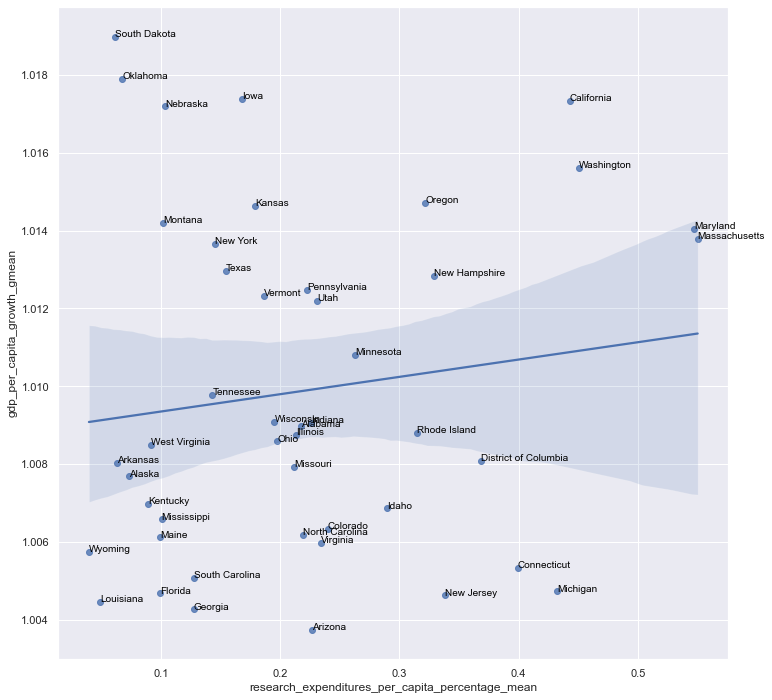

In [13]:
seaborn.set(rc={'figure.figsize':(12, 12)})
seaborn.regplot(x="research_expenditures_per_capita_percentage_mean", y="gdp_per_capita_growth_gmean", data=data_final_agg)
for line in range(0,data_final_agg.shape[0]):
     plt.text(data_final_agg.iloc[line, 2], data_final_agg.iloc[line, 1], data_final_agg.iloc[line, 0], size='small', color='black')

